## 实验数据介绍

In [1]:
import numpy as np

In [2]:
data = np.loadtxt(fname='线性数据.csv', delimiter='\t')

In [3]:
data.shape

(1503, 6)

可以看到所有的数据共有1503个，每个数据的前5个是特征，最后一个是标签。之后可以将数据标准化：

In [4]:
data -= data.mean(axis=0)
data /= data.std(axis=0)

In [5]:
x = data[:, :-1]
y = data[:, -1]

In [6]:
print(x.shape)
print(y.shape)

(1503, 5)
(1503,)


## 梯度下降

In [7]:
N, M = x.shape
w = np.ones(M)
b = 0

In [8]:
def predict(x):
    return w.dot(x) + b

In [9]:
predict(x[0])

0.6590042695516537

In [10]:
def get_loss():
    loss = 0
    for i in range(N):
        pred = predict(x[i])
        loss += (pred - y[i])**2
    return loss / N

In [11]:
get_loss()

7.367867692433939

采用暴力求解梯度的方法，loss的增量等于变量的增量除以导数。所有变量的导数求出来之后组合在一起就是梯度：

In [12]:
def get_gradient():
    global w
    global b
    
    eps = 1e-3
    loss_before = get_loss()
    
    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss()
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
    
    b += eps
    loss_after = get_loss()
    b -= eps
    gradient_b = (loss_after - loss_before) / eps
    return gradient_w, gradient_b
get_gradient()

(array([2.03668543, 2.38225639, 1.02215384, 2.13526642, 3.22327899]),
 0.0010000000028043132)

In [13]:
plt_x = []
plt_y = []
for i in range(500):
    gradient_w, gradient_b = get_gradient()
    w -= gradient_w * 1e-2
    b -= gradient_b * 1e-2
    
    plt_x.append(i)
    plt_y.append(get_loss())
    
    if i % 50 == 0:
        print(i, get_loss())

0 7.112757670092118
50 1.7854577366417097
100 0.8188794143218295
150 0.5927178198131919
200 0.5305917673804574
250 0.5095310094727199
300 0.5002280440367773
350 0.49505059549135016
400 0.49174823787397737
450 0.4895084809222189


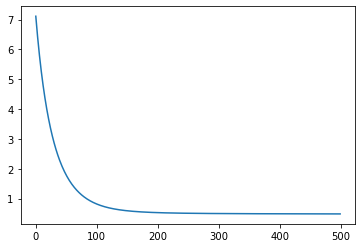

In [14]:
from matplotlib import pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## 随机梯度下降

随机梯度下降算法每次只计算一个数据的loss，或者是一个小批次的数据的梯度。

In [15]:
w = np.ones(M)
b = 0

In [16]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss

In [17]:
get_loss(x[0], y[0])

0.21258140154187224

In [18]:
def get_gradient(x, y):
    global w
    global b
    
    eps = 1e-3
    loss_before = get_loss(x, y)
    
    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
    
    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps
    return gradient_w, gradient_b
get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.923131013559203)

In [19]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss
total_loss()

11073.905141728208

In [20]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    w -= gradient_w * 1e-3
    b -= gradient_b * 1e-3
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, total_loss())

0 11018.98325984619
150 6767.546480410895
300 4406.375854544463
450 3183.970591552821
600 2514.5614649099575
750 2051.980707121668
900 1571.5531213187382
1050 1284.9495965714186
1200 1092.939646426755
1350 959.9788272725818
1500 891.810188777222
1650 853.5445004673935
1800 818.8243269595512
1950 801.1281990446071
2100 787.3862067839652
2250 773.4396395023326
2400 767.128098492772


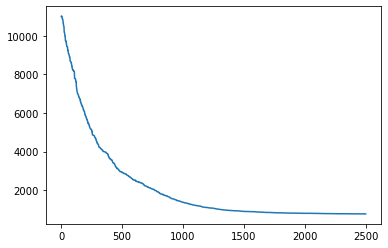

In [21]:
from matplotlib import pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## 动量法

In [22]:
N, M = x.shape
w = np.ones(M)
b = 0

In [23]:
momentum_w = np.zeros(M)
momentum_b = 0

In [24]:
plt_x = []
plt_y = []
for epoch in range(1500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    
    # 更新动量的数学公式
    momentum_w = 0.8 * momentum_w + gradient_w
    momentum_b = 0.8 * momentum_b + gradient_b
    
    w -= momentum_w * 1e-3
    b -= momentum_b * 1e-3
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, momentum_w, momentum_b, total_loss())

0 [ 4.54520194 10.03593681 -1.48380453 10.774955    6.02361725] -8.752137553653228 10963.296994765335
150 [ 1.14116589 -0.41536014  2.1908524   0.20781911 -0.3570799 ] -0.5304604494038009 2652.0445203772106
300 [ 3.52603604 -1.87489373  4.77022339 -3.5501991  -3.39223547] 4.762476831516062 1052.3559088899708
450 [-3.88555969  1.57312955 -1.625069   -3.93894697 -0.04121105] -1.4185615467433992 799.3843811531681
600 [ 2.9799775  -2.12935128  1.86096838  0.99786768 -2.98758863] 3.0932609520422707 784.097140022127
750 [ 0.29304358 -0.04327593  0.98427183 -0.52108974 -0.23543264] 1.3164141383731096 769.8781180932318
900 [-0.6955837   1.44840087  1.32004239  0.58719887  0.11130226] 2.134201340576401 767.3931842454718
1050 [-1.56933646  1.36621389 -1.90732647 -2.48302866 -1.19461704] 3.0280016623035984 750.8042717476307
1200 [ 2.59563335 -0.39056897 -1.43630797 -0.88525575  0.51346167] -2.8163748795215042 754.9853068597146
1350 [ 0.36483402  1.93868014  0.04223096 -1.01420744  3.80768199] 3.1

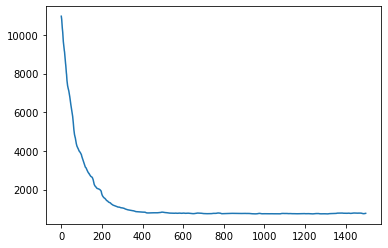

In [25]:
import matplotlib.pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## Ada Grad

初始化变量S

In [26]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

In [27]:
def predict(x):
    return w.dot(x) + b
predict(x[0])

0.6590042695516537

In [28]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss
get_loss(x[0], y[0])

0.21258140154187224

In [29]:
def get_gradient(x, y):
    global w
    global b
    
    eps = 1e-3
    loss_before = get_loss(x, y)
    
    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
    
    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps
    return gradient_w, gradient_b
get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.923131013559203)

In [30]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    
    # ada grad的特点是每个变量都有属于自己的lr
    # 要计算各个变量的lr，先要计算S
    S_w = S_w + gradient_w ** 2
    S_b = S_b + gradient_b ** 2
    
    # 计算lr的公式，其中的1e-1是原本的lr，1e-6是防止除0的。
    lr_w = 1e-1 / ((S_w + 1e-6) ** 0.5)
    lr_b = 1e-1 / ((S_b + 1e-6) ** 0.5)
    
    # 所以在时刻0，lr就等于梯度的倒数
    # 梯度大的变量会有小lr，梯度小的变量会有大lr
    # 往后的每一个时刻，都是类似动量法，考虑上一步的梯度
    w -= gradient_w * lr_w
    b -= gradient_b * lr_b
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, lr_w, lr_b, total_loss())

0 [0.08535775 0.03123188 0.00880325 0.00850152 0.01347442] 0.01046619438714938 9533.035119180047
150 [0.00128641 0.00183651 0.00229204 0.0018379  0.00143599] 0.002023489814792776 3621.4387634486
300 [0.00112775 0.00154885 0.00179625 0.00157366 0.00123556] 0.0016754205386760234 2292.344345380526
450 [0.00106201 0.00140195 0.00163073 0.00144537 0.00105122] 0.001514439926483615 1633.6143853064164
600 [0.00099368 0.00132355 0.00151155 0.00136257 0.00097487] 0.0014127875047997688 1232.8010274181556
750 [0.00097165 0.00128442 0.00144908 0.00130464 0.00095388] 0.0013545395751017977 1035.2372367748883
900 [0.0009596  0.00123979 0.0013949  0.00126205 0.00094351] 0.0013095583208970812 931.0950838887256
1050 [0.00094364 0.00120473 0.0013616  0.00122946 0.00092585] 0.0012752969589593923 872.4512097288691
1200 [0.00093294 0.00115362 0.00132183 0.00119974 0.00091488] 0.0012410372760888312 834.0807198311782
1350 [0.00091233 0.00110874 0.00128876 0.0011729  0.00089865] 0.001209935403570654 796.2063811

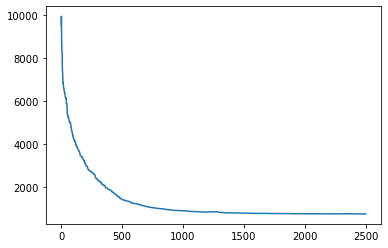

In [31]:
import matplotlib.pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## Rms Prop

Rms Prop是对Ada Grad的一个改进。

In [32]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

In [33]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    
    # 和adagrad唯一的区别，就是多了两个系数，也就是0.2和0.8。这两个系数相加要等于1
    # rmsprop是对adagrad的一个改进，在adagrad中lr是单调递减的。
    # 但是在rmsprop中lr是有可能上升的。
    S_w = 0.2 * S_w + 0.8 * gradient_w ** 2
    S_b = 0.2 * S_b + 0.8 * gradient_b ** 2
    
    # 计算lr的公式，其中的1e-1是原本的lr，1e-6是防止除0的。
    lr_w = 1e-2 / ((S_w + 1e-6) ** 0.5)
    lr_b = 1e-2 / ((S_b + 1e-6) ** 0.5)
    
    # 所以在时刻0，lr就等于梯度的倒数
    # 梯度大的变量会有小lr，梯度小的变量会有大lr
    # 往后的每一个时刻，都是类似动量法，考虑上一步的梯度
    w -= gradient_w * lr_w
    b -= gradient_b * lr_b
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, lr_w, lr_b, total_loss())

0 [0.00017178 0.00062371 0.00039731 0.00054451 0.00110885] 0.0007149196155235839 11082.737294139739
150 [0.01360927 0.01114579 0.02141123 0.00967133 0.00476725] 0.009017303411248675 5928.890320907771
300 [0.00872506 0.00221998 0.00274654 0.00208793 0.00321779] 0.002550632006160225 2174.7556245167125
450 [0.01146167 0.02142686 0.01630069 0.00753997 0.01961141] 0.009612324459099781 1131.7170132935607
600 [0.00737339 0.02967196 0.0209435  0.01685449 0.01546623] 0.007769313302285272 792.0268165253113
750 [0.04524322 0.01528491 0.01585519 0.00503112 0.03433982] 0.006604273656719981 802.1489053727144
900 [0.02231947 0.02269927 0.03930508 0.02745227 0.02224506] 0.01655160756840423 848.964418917171
1050 [0.02304829 0.00582661 0.01224247 0.01037837 0.01543074] 0.013618088147440883 1018.1854427034598
1200 [0.00799737 0.01043663 0.00720858 0.00939776 0.00935335] 0.008212352537811583 941.8150109614421
1350 [0.00434516 0.0136207  0.0130756  0.01235214 0.02398663] 0.014754390204086983 818.8344013714

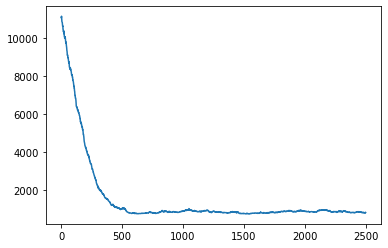

In [34]:
import matplotlib.pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## Ada Delta

In [46]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

delta_w = np.zeros(M)
delta_b = 0

In [47]:
plt_x = []
plt_y = []

for epoch in range(5500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    
    # ada_delta算法不需要设定超参数lr
    # 他需要维持两个变量，delta和S
    
    # S的计算和rmsprop完全一致
    S_w = 0.2 * S_w + 0.8 * gradient_w ** 2
    S_b = 0.2 * S_b + 0.8 * gradient_b ** 2
    
    # 计算lr的公式，这里1e-6是为了防止除0
    lr = (delta_w + 1e-6) / (S_w + 1e-6)
    gradient_w = lr ** 0.5 * gradient_w
    
    lr = (delta_b + 1e-6) / (S_b + 1e-6)
    gradient_b = lr ** 0.5 * gradient_b
    
    # 更新参数
    w -= gradient_w
    b -= gradient_b
    
    # 更新delta，这里的两个系数和计算S时用的要一样
    delta_w = 0.2 * delta_w + 0.8 * gradient_w ** 2
    delta_b = 0.2 * delta_b + 0.8 * gradient_b ** 2
    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 500 == 0:
        print(epoch, delta_w[:2], delta_b, total_loss())

0 [9.99990017e-07 9.99991250e-07] 9.999964037487817e-07 11066.38480036612
500 [2.86650360e-07 3.13924738e-07] 4.219924262043809e-07 7612.49021370505
1000 [8.91834783e-07 6.81278012e-07] 4.840845710791951e-06 5139.4691864179995
1500 [2.23944981e-07 1.84872537e-07] 3.220026385409182e-07 3515.68776513208
2000 [7.68718436e-07 8.38462015e-07] 2.4098979945596378e-06 2296.646496378899
2500 [1.49385925e-06 1.41999065e-06] 4.230454495900316e-06 1469.8220803416043
3000 [6.85675195e-06 3.55586338e-06] 5.715220596999653e-06 1056.8608261794714
3500 [1.33163522e-06 1.33740139e-06] 1.1613072905818659e-06 886.3280050957466
4000 [4.13305185e-07 1.96855796e-06] 2.318567003332278e-06 814.7980220509943
4500 [1.01054086e-07 1.70442892e-06] 1.344574777833456e-06 783.8895369046137
5000 [3.70623561e-07 2.68439092e-07] 1.2947504037484625e-06 803.0305279516311


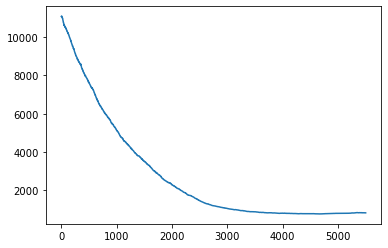

In [48]:
import matplotlib.pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()

## adam

In [49]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

v_w = np.zeros(M)
v_b = 0

In [50]:
plt_x = []
plt_y = []

for t in range(1, 5500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    v_w = 0.9 * v_w + 0.1 * gradient_w
    v_b = 0.9 * v_b + 0.1 * gradient_b

    #S的计算和rmsprop完全一致
    S_w = 0.999 * S_w + 0.001 * gradient_w**2
    S_b = 0.999 * S_b + 0.001 * gradient_b**2

    #根据以上公式,在时刻0
    #v = [0.1 * gradient_0]

    #这可能太过于小,为了消除这个影响,需要做偏差修正,也就是除以系数
    #v = 0.1 * sigma[0.9**(t-i) * gradient_i]
    #S = 0.001 * sigma[0.999**(t-i) * gradient_i**2]
    
    #将梯度的系数部分整理得到
    #0.1 * sigma[0.9**(t-i)] = 1-0.9**t

    #偏差修正
    v_hat_w = v_w / (1 - 0.9**t)
    v_hat_b = v_b / (1 - 0.9**t)
    S_hat_w = S_w / (1 - 0.999**t)
    S_hat_b = S_b / (1 - 0.999**t)

    #下面是adam参数更新的公式
    #这里的1e-2是超参数lr
    gradient_w = (1e-2 * v_hat_w) / (S_hat_w**0.5 + 1e-6)
    gradient_b = (1e-2 * v_hat_b) / (S_hat_b**0.5 + 1e-6)

    #更新参数
    w -= gradient_w
    b -= gradient_b

    plt_x.append(t)
    plt_y.append(total_loss())

    if t % 500 == 0:
        print(t, v_hat_w[:2], S_hat_w[:2], total_loss())

500 [ 0.8210492  -0.16254505] [25.13464341  9.38156047] 1241.6203038292579
1000 [-0.57929494  0.61689045] [11.11189641  5.09345097] 779.0172889933908
1500 [-0.13210487 -0.11913725] [7.05757422 3.77789265] 742.9203727105327
2000 [ 0.49743086 -0.23717637] [5.1885866  2.92635755] 731.5001530153712
2500 [-0.03781607  0.45067973] [4.10266581 2.81857743] 775.3700025269804
3000 [ 0.70743968 -0.12412685] [4.060947   3.17325196] 772.6234991344693
3500 [-0.05986598  0.58811388] [3.82992625 2.92814979] 808.2218082586758
4000 [ 0.44764671 -0.38209853] [3.84685773 2.65028635] 830.9018853240666
4500 [-1.50869871  0.47240077] [3.64609699 2.37864144] 757.8684865807296
5000 [-0.14032573 -0.29879778] [3.72019325 2.56406764] 750.26393781619


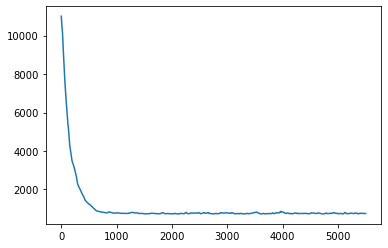

In [51]:
from matplotlib import pyplot as plt

plt.plot(plt_x, plt_y)
plt.show()